In [3]:
!pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


Q1 - make a neural net and make run it on a dataset

In [95]:
# -*- coding: utf-8 -*-
import torch


class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
        self.loss = torch.nn.CrossEntropyLoss(reduction='sum')
        self.optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred
    



# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
# N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
# x = torch.randn(N, D_in)
# y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
# model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.


In [5]:
import pandas as pd

In [12]:
data = pd.read_csv('BreastCancerTrain.csv', header=None)

In [23]:
X = data.iloc[:,0:-1]

In [38]:
Y = data.iloc[:,-1]

In [28]:
D_in = X.shape[1]

In [31]:
D_out = len(pd.unique(Y))

In [108]:
H = 200

In [109]:
model = TwoLayerNet(D_in, H, D_out)

In [110]:
for t in range(10000):
    # Forward pass: compute predicted y by passing x to the model.
    x_y = data.sample(64)
    x = torch.tensor(x_y.iloc[:,:-1].values, dtype = torch.float)
    y = torch.tensor(x_y.iloc[:,-1].values, dtype = torch.long)
    
    y_pred = model(x)

    # Compute and print loss.
    loss = model.loss(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    model.optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    model.optimizer.step()

99 54.77817916870117
199 58.02121353149414
299 57.28565979003906
399 55.201045989990234
499 50.46632385253906
599 55.58230972290039
699 52.088871002197266
799 49.34914016723633
899 53.42759323120117
999 56.765106201171875
1099 53.64525604248047
1199 47.53013610839844
1299 44.258445739746094
1399 47.60482406616211
1499 52.18941879272461
1599 50.74026870727539
1699 49.9868278503418
1799 54.37403106689453
1899 50.851131439208984
1999 47.32096862792969
2099 50.83230972290039
2199 57.996517181396484
2299 57.37910842895508
2399 46.1192626953125
2499 54.414039611816406
2599 54.525146484375
2699 47.798133850097656
2799 52.43289566040039
2899 50.54432678222656
2999 51.8719596862793
3099 53.153968811035156
3199 53.6134033203125
3299 56.42311096191406
3399 52.783145904541016
3499 47.32718276977539
3599 54.505455017089844
3699 54.85740661621094
3799 50.22853469848633
3899 46.23911666870117
3999 49.5628776550293
4099 52.246639251708984
4199 53.38294982910156
4299 47.10334396362305
4399 50.188121795

In [111]:
y_pred = model(torch.tensor(X.values, dtype=torch.float))

In [112]:
import numpy as np
argmax = np.argmax(y_pred.detach().numpy(), axis=1)

In [113]:
(sum(torch.argmax(y_pred, axis=1).numpy()==Y))/len(Y)

0.7262247838616714

In [93]:
values, indices = y_pred.max(1)

In [94]:
(sum(indices.numpy()==Y))/len(Y)

0.35446685878962536

Q2 - vary the learning rate

In [ ]:
class MultiLayerNet(torch.nn.Module):
    def __init__(self, D_in, D_out, H = [200,200], lr=1e-3):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super().__init__()
        self._layers = []
        self._layers.append(torch.nn.Linear(D_in, H[0]))
        for i,_ in enumerate(H[1:]):
            self._layers.append(torch.nn.Linear(H[i-1], H[i]))
        self._layers.append(torch.nn.Linear(H[-1], D_out))
        self.loss = torch.nn.CrossEntropyLoss(reduction='sum')
        self.optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        for layer in self._layers[:-1]:
            x = layer(x).clamp(min=0)
        return self._layers[-1](x)
    
    def train(self, data, batch_size, num_batches):
        pass
        
        

In [114]:
import matplotlib.pyplot as plt

In [115]:
x = np.linspace(-10,10)

In [117]:
y = np.maximum(0,x)

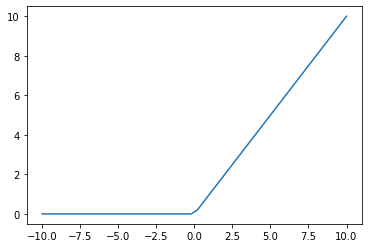

In [118]:
plt.plot(x,y)

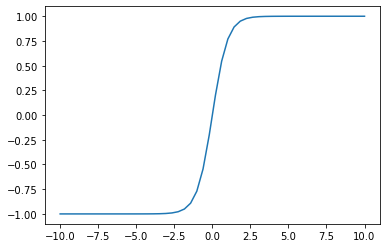

In [119]:
plt.plot(x,np.tanh(x))

Q3 - Train an MLP on MNIST :'(

Q4 - Visualise the weight matrix of the first row